### Code Source: [Github](https://github.com/FelixFrankFelix/DSN-MICROSOFT-HACKATHON/blob/main/Data%20Preprocessing-Modelling.ipynb)

#### Import Libraries 

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv("data/Housing_dataset_train.csv")
test = pd.read_csv("data/Housing_dataset_test.csv")
train

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898
...,...,...,...,...,...,...,...
13995,6175,Edo,Bungalow,NaN,7.0,NaN,2367927.861
13996,9704,Kaduna,Apartment,NaN,7.0,5.0,2228516.471
13997,11190,Plateau,Bungalow,8.0,6.0,5.0,2406812.693
13998,9256,Delta,Flat,NaN,6.0,1.0,3348918.718


In [3]:
train['ind'] = 1
test['ind'] = 0

# Concatenate train and test DataFrames
combined_df = pd.concat([train, test])

# Output the combined DataFrame
combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


### Data Cleaning

In [4]:
combined_df.dropna(subset=['loc','title'],inplace=True)
combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689,1
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898,1
5,1733,Borno,Mansion,NaN,1.0,3.0,1341750.867,1
...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0


In [5]:
median_bedroom = combined_df['bedroom'].median()
combined_df['bedroom'].fillna(median_bedroom, inplace=True)


In [6]:
median_bathroom = combined_df['bathroom'].median()
combined_df['bathroom'].fillna(median_bathroom, inplace=True)


In [7]:
median_parking_space = combined_df['parking_space'].median()
combined_df['parking_space'].fillna(median_parking_space, inplace=True)



In [8]:
combined_df.isnull().sum()

ID                  0
loc                 0
title               0
bedroom             0
bathroom            0
parking_space       0
price            6000
ind                 0
dtype: int64

### Features Engineering

In [8]:
combined_df["is_lagos"] = combined_df["loc"].apply(lambda x: 1 if x == "Lagos" else 0)
combined_df["is_mansion"] = combined_df["title"].apply(
    lambda x: 1 if x == "Mansion" else 0
)

In [9]:
combined_df["comfort_ind"] = combined_df["bedroom"] / combined_df["bathroom"]
combined_df["size"] = (
    combined_df["bedroom"] + combined_df["bathroom"] + combined_df["parking_space"]
)
combined_df["comfort_by_size"] = combined_df["comfort_ind"] * combined_df["size"]

In [10]:
combined_df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price,ind,is_lagos,is_mansion,comfort_ind,size,comfort_by_size
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,0,0,1.0,5.0,5.0
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,1,0,0,2.0,10.0,20.0
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1,0,0,2.5,11.0,27.5
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0,0,0.8,15.0,12.0
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,1,0,1,4.0,8.0,32.0


In [11]:
population_level_1 = ["Anambra", "Enugu", "Imo", "Lagos"]
population_level_2 = ["Abia", "Kano", "Rivers"]
population_level_3 = ["Akwa Ibom", "Ebonyi", "Ekiti", "Osun"]
population_level_4 = ["Katsina", "Ogun", "Ondo"]
population_level_5 = ["Bauchi", "Delta", "Jigawa", "Oyo"]
population_level_6 = ["Bayelsa", "Edo", "Gombe"]
population_level_7 = ["Cross River", "Kaduna", "Plateau", "Sokoto"]
population_level_8 = ["Kebbi", "Kogi", "Zamfara"]
population_level_9 = ["Adamawa", "Benue", "Kwara", "Nasarawa"]
population_level_10 = ["Borno", "Niger", "Taraba", "Yobe"]

combined_df["population_density_level"] = combined_df["loc"].apply(
    lambda x: 10
    if x in population_level_1
    else 9
    if x in population_level_2
    else 8
    if x in population_level_3
    else 7
    if x in population_level_4
    else 6
    if x in population_level_5
    else 5
    if x in population_level_6
    else 4
    if x in population_level_7
    else 3
    if x in population_level_8
    else 2
    if x in population_level_9
    else 1
    if x in population_level_10
    else 0
)


combined_df

,ID,loc,title,bedroom,bathroom,parking_space,price,ind,is_lagos,is_mansion,comfort_ind,size,comfort_by_size,population_density_level
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,0,0,1.000000,5.0,5.000000,7
1,2748,Ondo,Apartment,4.0,2.0,4.0,1672416.689,1,0,0,2.000000,10.0,20.000000,7
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756,1,0,0,2.500000,11.0,27.500000,10
4,10300,Kogi,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0,0,0.800000,15.0,12.000000,3
5,1733,Borno,Mansion,4.0,1.0,3.0,1341750.867,1,0,1,4.000000,8.0,32.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Ekiti,Flat,4.0,5.0,2.0,NaN,0,0,0,0.800000,11.0,8.800000,8
5996,2416,Adamawa,Terrace duplex,5.0,7.0,1.0,NaN,0,0,0,0.714286,13.0,9.285714,2
5997,10195,Oyo,Townhouse,4.0,1.0,4.0,NaN,0,0,0,4.000000,9.0,36.000000,6
5998,9455,Bauchi,Flat,3.0,7.0,5.0,NaN,0,0,0,0.428571,15.0,6.428571,6


In [12]:
import category_encoders as ce

# Assuming you have the combined_df DataFrame with 'loc' and 'price' columns

# Create a new DataFrame to store the encoded values
encoded_df = combined_df.copy()

# Define the encoder instance
encoder = ce.TargetEncoder(cols=['loc'])

# Fit the encoder on the 'loc' column and 'price' target variable
encoder.fit(encoded_df['loc'], encoded_df['price'])

# Transform the 'loc' column with the encoded values
encoded_df['loc_encoded'] = encoder.transform(encoded_df['loc'])


encoded_df['loc_encoded'] = round((encoded_df['loc_encoded']/10_000_000),2)
# Drop the original 'loc' column if you no longer need it
encoded_df.drop('loc', axis=1, inplace=True)

# Print the updated DataFrame with the encoded 'loc' column
encoded_df

,ID,title,bedroom,bathroom,parking_space,price,ind,is_lagos,is_mansion,comfort_ind,size,comfort_by_size,population_density_level,loc_encoded
0,3583,Semi-detached duplex,2.0,2.0,1.0,1149999.565,1,0,0,1.000000,5.0,5.000000,7,0.20
1,2748,Apartment,4.0,2.0,4.0,1672416.689,1,0,0,2.000000,10.0,20.000000,7,0.23
3,2224,Detached duplex,5.0,2.0,4.0,2410306.756,1,0,0,2.500000,11.0,27.500000,10,0.24
4,10300,Terrace duplex,4.0,5.0,6.0,2600700.898,1,0,0,0.800000,15.0,12.000000,3,0.18
5,1733,Mansion,4.0,1.0,3.0,1341750.867,1,0,1,4.000000,8.0,32.000000,1,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1594,Flat,4.0,5.0,2.0,NaN,0,0,0,0.800000,11.0,8.800000,8,0.21
5996,2416,Terrace duplex,5.0,7.0,1.0,NaN,0,0,0,0.714286,13.0,9.285714,2,0.19
5997,10195,Townhouse,4.0,1.0,4.0,NaN,0,0,0,4.000000,9.0,36.000000,6,0.23
5998,9455,Flat,3.0,7.0,5.0,NaN,0,0,0,0.428571,15.0,6.428571,6,0.17


In [13]:
import pandas as pd

# Assuming you have the combined_df DataFrame with 'title' and 'price' columns

# Calculate the average price for each title
title_average_price = combined_df.groupby("title")["price"].mean()

# Create a new DataFrame to store the title and its corresponding average price
title_avg_price_df = pd.DataFrame(
    {"title": title_average_price.index, "avg_price": title_average_price.values}
)

# Sort the DataFrame by the average price in ascending order
title_avg_price_df.sort_values(by="avg_price", inplace=True)

# Create a new column 'title_rank' with the rank based on average price
title_avg_price_df["title_rank"] = range(1, len(title_avg_price_df) + 1)

# Merge the 'title_rank' column back to the original DataFrame based on 'title' column
encoded_df = pd.merge(
    encoded_df, title_avg_price_df[["title", "title_rank"]], on="title", how="left"
)

# Sort the DataFrame by 'title_rank' column to order the titles based on average price rank
# encoded_df.sort_values(by='title_rank', inplace=True)

# Drop the 'title_rank' column if you no longer need it
encoded_df.drop("title", axis=1, inplace=True)

# Print the updated DataFrame with the 'title' column ranked by average price
encoded_df

,ID,bedroom,bathroom,parking_space,price,ind,is_lagos,is_mansion,comfort_ind,size,comfort_by_size,population_density_level,loc_encoded,title_rank
0,3583,2.0,2.0,1.0,1149999.565,1,0,0,1.000000,5.0,5.000000,7,0.20,5
1,2748,4.0,2.0,4.0,1672416.689,1,0,0,2.000000,10.0,20.000000,7,0.23,2
2,2224,5.0,2.0,4.0,2410306.756,1,0,0,2.500000,11.0,27.500000,10,0.24,8
3,10300,4.0,5.0,6.0,2600700.898,1,0,0,0.800000,15.0,12.000000,3,0.18,6
4,1733,4.0,1.0,3.0,1341750.867,1,0,1,4.000000,8.0,32.000000,1,0.17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16526,1594,4.0,5.0,2.0,NaN,0,0,0,0.800000,11.0,8.800000,8,0.21,3
16527,2416,5.0,7.0,1.0,NaN,0,0,0,0.714286,13.0,9.285714,2,0.19,6
16528,10195,4.0,1.0,4.0,NaN,0,0,0,4.000000,9.0,36.000000,6,0.23,7
16529,9455,3.0,7.0,5.0,NaN,0,0,0,0.428571,15.0,6.428571,6,0.17,3


In [14]:
combined_df = encoded_df

### Modeling

In [15]:
train = combined_df[combined_df.ind == 1]
test = combined_df[combined_df.ind == 0]


train

,ID,bedroom,bathroom,parking_space,price,is_lagos,is_mansion,comfort_ind,size,comfort_by_size,population_density_level,loc_encoded,title_rank
0,3583,2.0,2.0,1.0,1149999.565,0,0,1.000000,5.0,5.000000,7,0.20,5
1,2748,4.0,2.0,4.0,1672416.689,0,0,2.000000,10.0,20.000000,7,0.23,2
2,2224,5.0,2.0,4.0,2410306.756,0,0,2.500000,11.0,27.500000,10,0.24,8
3,10300,4.0,5.0,6.0,2600700.898,0,0,0.800000,15.0,12.000000,3,0.18,6
4,1733,4.0,1.0,3.0,1341750.867,0,1,4.000000,8.0,32.000000,1,0.17,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10526,10477,8.0,1.0,6.0,2837199.086,0,0,8.000000,15.0,120.000000,1,0.19,8
10527,6175,4.0,7.0,3.0,2367927.861,0,0,0.571429,14.0,8.000000,5,0.23,4
10528,9704,4.0,7.0,5.0,2228516.471,0,0,0.571429,16.0,9.142857,4,0.19,2
10529,11190,8.0,6.0,5.0,2406812.693,0,0,1.333333,19.0,25.333333,4,0.19,4


In [16]:
#X = train.drop(['geopolitical_zone'],axis=1)
X = train.drop(['ID','price'],axis=1)
y = train.price
X

,bedroom,bathroom,parking_space,is_lagos,is_mansion,comfort_ind,size,comfort_by_size,population_density_level,loc_encoded,title_rank
0,2.0,2.0,1.0,0,0,1.000000,5.0,5.000000,7,0.20,5
1,4.0,2.0,4.0,0,0,2.000000,10.0,20.000000,7,0.23,2
2,5.0,2.0,4.0,0,0,2.500000,11.0,27.500000,10,0.24,8
3,4.0,5.0,6.0,0,0,0.800000,15.0,12.000000,3,0.18,6
4,4.0,1.0,3.0,0,1,4.000000,8.0,32.000000,1,0.17,10
...,...,...,...,...,...,...,...,...,...,...,...
10526,8.0,1.0,6.0,0,0,8.000000,15.0,120.000000,1,0.19,8
10527,4.0,7.0,3.0,0,0,0.571429,14.0,8.000000,5,0.23,4
10528,4.0,7.0,5.0,0,0,0.571429,16.0,9.142857,4,0.19,2
10529,8.0,6.0,5.0,0,0,1.333333,19.0,25.333333,4,0.19,4


#### Baseline Model - Decision Tree

In [17]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz


# Specify the Graphviz executable path directly within graphviz
# graphviz.executables["dot"] = 'C:/Program Files (x86)/Graphviz2.38/bin/dot.exe'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create a Decision Tree regressor
dt_regressor = DecisionTreeRegressor(
    random_state=42, max_depth=3, min_samples_split=2, min_samples_leaf=2
)

# Perform cross-validation on the regressor
cv_scores = cross_val_score(
    dt_regressor, X_train, y_train, cv=5, scoring="neg_mean_squared_error"
)

# Train the decision tree on the training data
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=2, random_state=42)

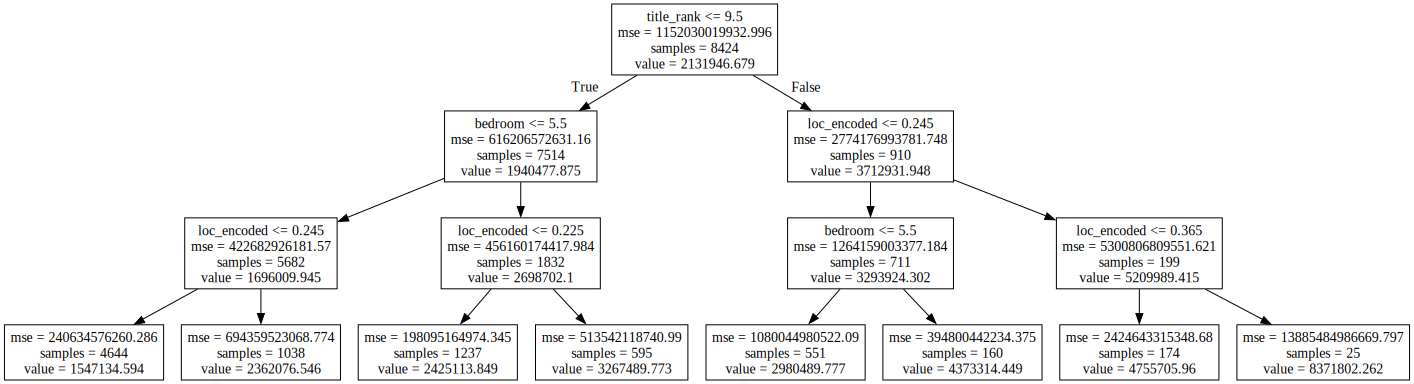

In [18]:
from sklearn import tree

feature_names = X.columns
tree_graph = tree.export_graphviz(dt_regressor, out_file=None, feature_names=feature_names,)
graphviz.Source(tree_graph)

In [19]:
# Display the decision tree using graphviz
dot_data = export_graphviz(dt_regressor, out_file=None, 
                           feature_names=X.columns, 
                           filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.view(filename="decision_tree_diag")  # Save the tree as a PDF or PNG image

# Convert the negative MSE scores to positive and take the square root to get RMSE
cv_rmse_scores = (-cv_scores) ** 0.5

# Print the cross-validation scores
print("Cross-validation RMSE scores:", cv_rmse_scores)
print("Mean CV RMSE:", cv_rmse_scores.mean())

# Evaluate the model on the test set
y_pred = dt_regressor.predict(X_test)
test_rmse = ((y_pred - y_test) ** 2).mean() ** 0.5
print("Test set RMSE:", test_rmse)

Cross-validation RMSE scores: [719767.50220294 697484.30437678 707338.52542303 702711.6596019
 654620.27503047]
Mean CV RMSE: 696384.4533270254
Test set RMSE: 674132.5679778286


In [17]:
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# Assuming you have the features in X and the target variable in y

# Define the CatBoost model
model = CatBoostRegressor(loss_function='RMSE', random_seed=42,silent=True)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate RMSE
rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error'))

# Train the model on the entire dataset
model.fit(X, y)

# Print the cross-validation RMSE scores
print('Cross-Validation RMSE:', rmse_scores)
print(rmse_scores.mean())


Cross-Validation RMSE: [420219.33079842 459504.72911971 395578.51878319 414523.45637395
 394107.35725026]
416786.67846510716


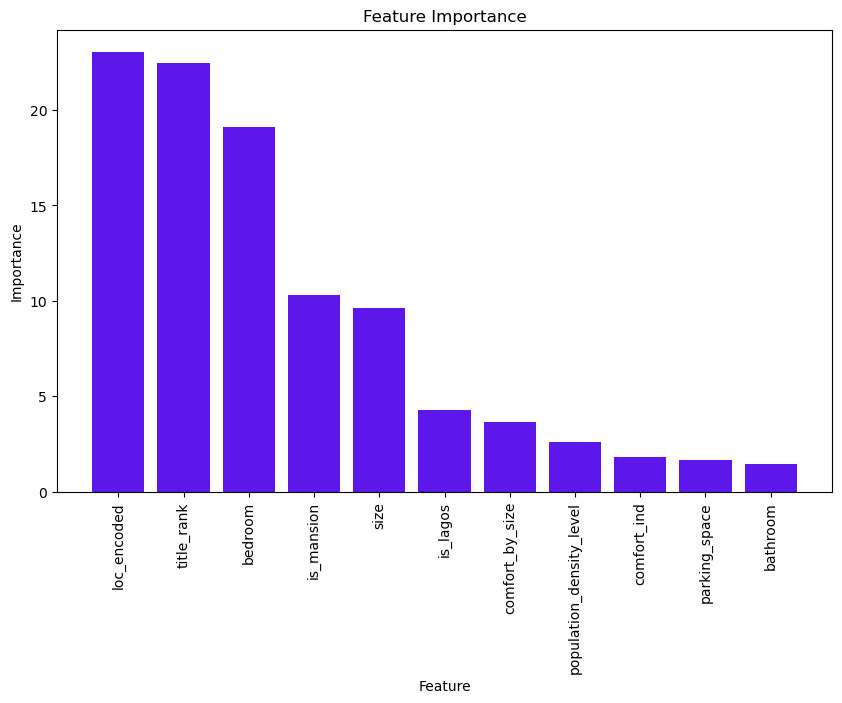

In [18]:
import matplotlib.pyplot as plt
feature_importance = model.get_feature_importance()

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to store the feature importance scores with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'],color='#5e17eb')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
# plt.savefig('plots/FE_importance')
plt.show()

In [19]:
X_test = test.drop(['ID'], axis=1)

# Use the trained model to predict prices for the test dataset
y_pred = model.predict(X_test)

# Reshape the predicted values to be a 1-dimensional array
y_pred = y_pred.reshape(-1)

# Create a DataFrame with ID and predicted price columns
predictions_df = pd.DataFrame({'ID': test['ID'], 'price': y_pred})

# Display the predictions DataFrame
predictions_df

,ID,price
10531,845,2.442882e+06
10532,1924,1.051200e+06
10533,10718,1.268340e+06
10534,12076,8.487365e+06
10535,12254,1.917632e+06
...,...,...
16526,1594,1.844463e+06
16527,2416,1.992104e+06
16528,10195,1.962001e+06
16529,9455,1.341037e+06


In [24]:
predictions_df.to_csv('submission.csv', index=False)